<a href="https://colab.research.google.com/github/krishnavamshikorpal/Deep-Learning-Portfolio/blob/master/MNIST_Hand_written_numbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import all the required libraries.**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Flatten,Dropout,Dense,MaxPooling2D
from tensorflow.keras.optimizers import SGD
from keras.utils import np_utils 
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from matplotlib.pyplot import imshow
import scipy.misc

**Importing training and testing data.**

In [ ]:
(train_X,train_y),(test_X,test_y) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print("X Train shape",train_X.shape)
print("Y Train shape",train_y.shape)
print("X Test shape",test_X.shape)
print("Y Test shape",test_y.shape)

X Train shape (60000, 28, 28)
Y Train shape (60000,)
X Test shape (10000, 28, 28)
Y Test shape (10000,)


So we have 60000 images to train the model and 10000 images to test the model. 

And (28, 28) is the height and width of the images. we can say image is 28*28 pixels. 

(60000, 28, 28) ==> (total images, height, width) 

***Here we are just randomly visualizing our 28X28 images.***

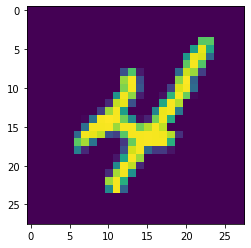

In [ ]:
plt.imshow(train_X[9])

In [ ]:
#Lets see how train_y looks. train_y contains exact numbers written in the image
train_y

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
test_X[0].shape

(28, 28, 1)

 we can.t give data in this format to our data, we need to one hot encode it.

**Preprocess our training and testing data.**

In [ ]:
#reshaping the data
train_X = train_X.reshape(-1,28,28,1)
test_X  = test_X.reshape(-1,28,28,1)

Our input shape was (60000,28,28), but Keras wants the data in (60000,28,28,1) format, that’s why we are reshaping it.

In [ ]:
print("train X after reshape: ", train_X.shape)
print("test X after reshape: ", test_X.shape)

train X after reshape:  (60000, 28, 28, 1)
test X after reshape:  (10000, 28, 28, 1)


(60000, 28, 28, 1) ==> (Images, height, width, channels) black & white image contains only 1 channel. 

where coloured images contains 3(red, blue, green).

In [ ]:
#converting to float
train_X = train_X.astype('float32')
test_X  = test_X.astype('float32')

In [ ]:
print(train_X.dtype)
print(test_X.dtype)

float32
float32


In [ ]:
#normalizing the data
train_X = train_X/255
test_X  = test_X/255

We are normalizing our image, as we know our grayscale image is just a 2D image with all values ranging in 0-255, that’s why we are diving this image/2D matrix by 255 to bring everything in range 0-1.

In [ ]:
#converting train and test labels to categorical buy changing it will easy to read the loss value easily
train_y = np_utils.to_categorical(train_y)
test_y  = np_utils.to_categorical(test_y)

– One Hot encode the labels. Previously at 1st index we had 1 but now a 10 element array will be there which is [1,0,0,0,0,0,0,0,0,0] where 1 depicts the presence of that number. 1 is present at 0 index means this array represents number 0. This whole thing is shown below.

In [ ]:
train_y[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
test_y[1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

**Let’s create our CNN model for MNIST Handwritten number recognition**

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu',input_shape=(28,28,1), padding='SAME'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),activation='relu',padding='SAME'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=SGD(0.01), metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               4

In [ ]:
# Set a learning rate annealer
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', 
                                patience=3, 
                                verbose=1, 
                                factor=0.2, 
                                min_lr=1e-6)

In [ ]:
# Data Augmentation
datagen = ImageDataGenerator(
            rotation_range=10, 
            width_shift_range=0.1, 
            height_shift_range=0.1, 
            zoom_range=0.1)
datagen.fit(train_X)

**Let’s train our model**

In [ ]:
batch_size=128
epochs=30
plotting_data = model.fit_generator(datagen.flow(train_X, train_y, batch_size=batch_size), steps_per_epoch=len(train_X)/batch_size,
                                    epochs=epochs, validation_data = (test_X, test_y), callbacks=[reduce_lr])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
468/468 [==============================] - 53s 53ms/step - loss: 1.9947 - accuracy: 0.3067 - val_loss: 0.9226 - val_accuracy: 0.7782
Epoch 2/30
468/468 [==============================] - 24s 52ms/step - loss: 1.3046 - accuracy: 0.5587 - val_loss: 0.4944 - val_accuracy: 0.8812
Epoch 3/30
468/468 [==============================] - 24s 52ms/step - loss: 0.9679 - accuracy: 0.6831 - val_loss: 0.3029 - val_accuracy: 0.9248
Epoch 4/30
468/468 [==============================] - 25s 53ms/step - loss: 0.7277 - accuracy: 0.7672 - val_loss: 0.2045 - val_accuracy: 0.9483
Epoch 5/30
468/468 [==============================] - 24s 52ms/step - loss: 0.5806 - accuracy: 0.8166 - val_loss: 0.1627 - val_accuracy: 0.9530
Epoch 6/30
468/468 [==============================] - 24s 52ms/step - loss: 0.4990 - accuracy: 0.8433 - val_loss: 0.1380 - val_accuracy: 0.9590
Epoch 7/30
468/468 [==============================] - 25s 53ms/step - loss: 0.4389 - accuracy: 0.8633 - val_loss: 0.1201 - val_accuracy:

**Evaluating Model**

In [ ]:
loss,accuracy = model.evaluate(test_X,test_y,verbose=0)
print('Test loss ---> ',str(round(loss*100,2)) +str('%'))
print('Test accuracy ---> ',str(round(accuracy*100,2)) +str('%'))

Test loss --->  3.97%
Test accuracy --->  98.69%


**Plot the results**

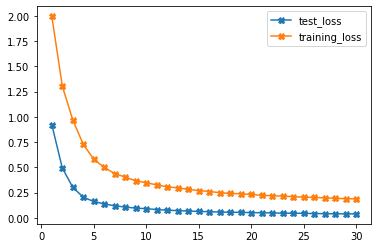

In [ ]:
plotting_data_dict = plotting_data.history
test_loss = plotting_data_dict['val_loss']
training_loss = plotting_data_dict['loss']
test_accuracy = plotting_data_dict['val_accuracy']
training_accuracy = plotting_data_dict['accuracy']
epochs = range(1,len(test_loss)+1)
plt.plot(epochs,test_loss,marker='X',label='test_loss')
plt.plot(epochs,training_loss,marker='X',label='training_loss')
plt.legend()

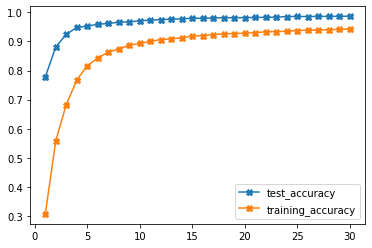

In [ ]:
plt.plot(epochs,test_accuracy,marker='X',label='test_accuracy')
plt.plot(epochs,training_accuracy,marker='X',label='training_accuracy')
plt.legend()

**Saving the model**

In [ ]:
model.save('MNIST_30_epochs')
print('Model Saved !!!')

INFO:tensorflow:Assets written to: MNIST_30_epochs/assets
Model Saved !!!


**Loading saved model**

In [ ]:
#loading and evaluating the saved model
from numpy import loadtxt
from keras.models import load_model

model = load_model("/content/MNIST_30_epochs")
print("Model loaded")
model.summary()

Model loaded
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 128)   

**Testing model with outside images**

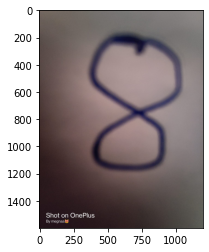

In [ ]:
image = plt.imread("/content/WhatsApp Image 2021-07-22 at 4.51.51 PM.jpeg")
plt.imshow(image)

In [ ]:
import tensorflow as tf
from keras_preprocessing import image
images = image.load_img("/content/WhatsApp Image 2021-07-22 at 4.51.51 PM.jpeg", target_size=(28, 28))    
x = image.img_to_array(images)
x = tf.image.rgb_to_grayscale(x)
x = np.expand_dims(x, axis=0)
x = x/255.0

model = tf.keras.models.load_model('/content/MNIST_30_epochs')
model.predict(x).argmax()

8

In [ ]:
# #Check the prediction for your own image
# img = cv2.imread("/content/WhatsApp Image 2021-07-22 at 4.51.51 PM.jpeg",0)
# img = cv2.resize(img, (28, 28))
# img = np.reshape(img, [1, 28, 28, 1])
# print(np.argmax(model.predict(img)))
# plt.imread('/content/WhatsApp Image 2021-07-22 at 4.51.51 PM.jpeg')
# print("class prediction vector [p(0), p(1), p(2), p(3), p(4), p(5)] = ")
# model = tf.keras.models.load_model('/content/MNIST_30_epochs')
# model.predict_proba(img)

0
class prediction vector [p(0), p(1), p(2), p(3), p(4), p(5)] = 


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


array([[1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        5.746289e-15, 0.000000e+00]], dtype=float32)